# 图像的基础操作

## 访问和修改像素值

In [1]:
import numpy as np
import cv2 as cv
img = cv.imread('data/messi5.jpg')

In [2]:
# 访问坐标为[100,100]的BGR通道的像素值
px = img[100,100]
px 

array([59, 65, 72], dtype=uint8)

In [3]:
# 仅访问蓝色通道
blue = img[100,100,0]
blue 

59

In [4]:
# 修改某坐标点的像素值
img[100,100] = [255,255,255]
img[100,100] 

cv.imshow('modify1', img)
cv.waitKey(0)
cv.destroyAllWindows()

## numpy方法快速访问和修改像素点

In [5]:
# 访问蓝色通道
img.item(100,100,0)

255

In [6]:
# 修改某坐标点的像素值
img.itemset((10,10,2),100)
img.item(10,10,2)

100

## 访问图像属性

In [7]:
# 图像的形状
img.shape

(280, 450, 3)

In [8]:
# 图像的像素总数
img.size

378000

【注意】**img.dtype在调试时非常重要，因为OpenCV-Python代码中的大量错误是由无效的数据类型引起的**

In [9]:
# 图像数据类型/位深度
img.dtype

dtype('uint8')

## 图像感兴趣区域ROI

In [10]:
import numpy as np
import cv2 as cv
img = cv.imread('data/messi5.jpg')

ball = img[220:280, 270:330]    # ROI
img[220:280, 80:140] = ball 

cv.imshow('ROI', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 拆分和合并图像通道

In [11]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

cv.split()是一项耗时的操作（就时间而言）。因此，仅在必要时才这样做。否则请进行Numpy索引

In [12]:
img[:, :, 0] = 0
img[:, :, 1] = 0
img[:, :, 2] = 0

In [13]:
import numpy as np
import cv2 as cv
img = cv.imread('data/messi5.jpg')

# 修改某通道的像素值
# pixel = np.zeros((280,450),np.uint8)
# img[..., 2]=pixel        # 修改R通道像素值

img[:, :, 2] = 0           # 直接赋值

cv.imshow('modify2', img)
cv.waitKey(0)
cv.destroyAllWindows()

## 为图像设置边框（填充）
cv.copyMakeBorder()

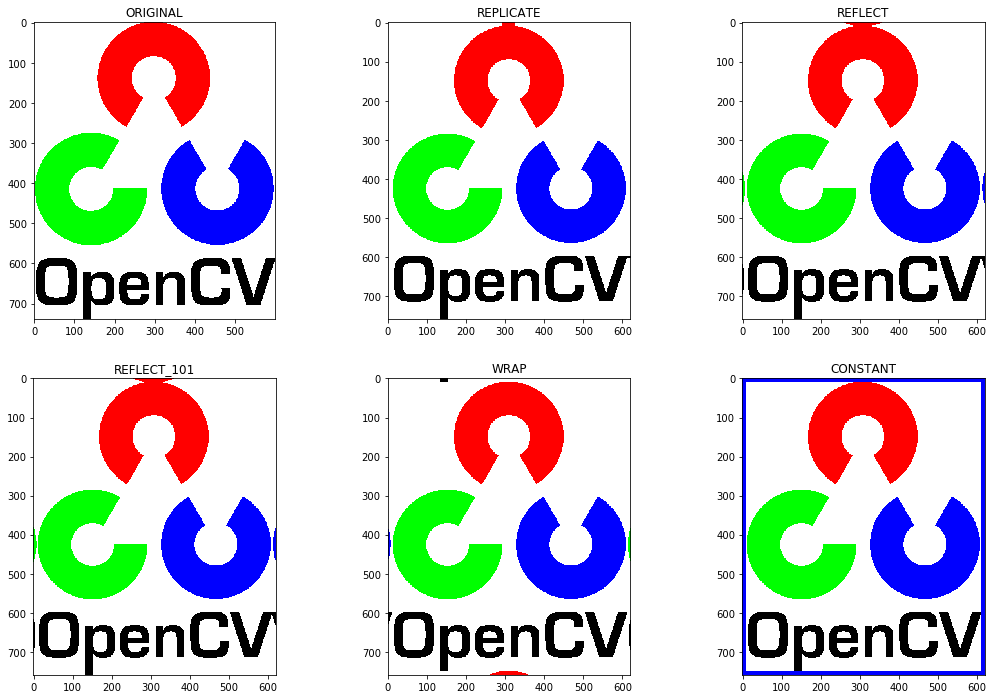

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [0,0,255]
img = cv.imread('data/opencv-logo.png')
img1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)          # 复制边界填充
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)              # 边界对称填充
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)       # 边界对称填充 cb|abcdefgh|gf
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)                    # 反向边界对称填充
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)  # 固定颜色填充，需要指定颜色
# img1-输入图像,10,10,10,10-top，bottom，left，right 边界宽度, 边框填充模式, 边框颜色

plt.figure(figsize=(18,12))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

# 图像上的算术运算
cv.add()，cv.addWeighted()

## 图像加法

【注意】 OpenCV加法和Numpy加法之间有区别。OpenCV加法是饱和运算，而Numpy加法是模运算

两个图像应具有**相同的深度和类型**，或者第二个图像可以只是一个**标量值**

In [15]:
x = np.uint8([250])
y = np.uint8([10])
z = 10
print(cv.add(x,y))    # 250+10 = 260 => 255
print(x+y)            # 250+10 = 260 % 256 = 4
print(x+z)

[[255]]
[4]
[4]


## 图像融合

In [16]:
img1 = cv.imread('data/ml.png')
img2 = cv.imread('data/opencv-logo.png')

h, w = img2.shape[0], img2.shape[1]  # img1->img3
img3 = cv.resize(img1, (w, h))

dst = cv.addWeighted(img2, 0.7, img3, 0.3, 0)    # γ=0
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## 按位运算
- cv.bitwise_and() 
- cv.bitwise_or() 
- cv.bitwise_xor() 
- cv.bitwise_not()

**当我们提取图像的一部分，选择非矩形ROI 时这些操作会很有用**

In [17]:
import cv2 as cv
# 加载两张图片
img1 = cv.imread('data/messi5.jpg')
img2 = cv.imread('data/opencv-logo-white.png')

# 我想把img2的logo放在左上角，所以我创建了ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)  # 现在创建logo的掩码，并同时创建其相反掩码
img2_fg = cv.bitwise_and(img2,img2,mask = mask)                # 将logo放入ROI并修改主图像

mask_inv = cv.bitwise_not(mask)                     # 现在将ROI中logo的区域涂黑
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)   # 仅从logo图像中提取logo区域

dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

# cv.imshow('mask',mask)
cv.imshow('img2_fg',img2_fg)

# cv.imshow('mask_inv',mask_inv)
cv.imshow('img1_bg',img1_bg)

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

# 程序性能检测及优化
cv2.getTickCount(),cv2.getTickFrequency()

```
e1 = cv.getTickCount()
# your code
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
```

In [18]:
# 返回程序运行时间
img1 = cv.imread('data/messi5.jpg')
e1 = cv.getTickCount()
for i in range(5, 49, 2):
    img1 = cv.medianBlur(img1, i)
e2 = cv.getTickCount()
t = (e2 - e1) / cv.getTickFrequency()
print('elpased time: {:.3f}s'.format(t))

elpased time: 0.196s


# OpenCV中的默认优化
cv.useOptimized(),cv.setUseOptimized()

In [19]:
# 检查OpenCV是否启用了代码优化
cv.useOptimized()

True

In [20]:
%timeit 
img = cv.imread('data/messi5.jpg')
res = cv.medianBlur(img,49)

In [21]:
# 关闭它
cv.setUseOptimized(False)
cv.useOptimized()

False

In [22]:
%timeit 
img = cv.imread('data/messi5.jpg')
res = cv.medianBlur(img,49)

# 在IPython中衡量性能
【注意】通常，OpenCV函数比Numpy函数要快。因此，对于相同的操作，首选OpenCV功能。但是，可能会有例外，尤其是当Numpy处理视图而不是副本时

【注意】Python 的标量计算比Numpy的标量计算要快。对于仅包含一两个元素的操作Python 标量比Numpy 的数组要快。但是当数组稍微大一点时Numpy 就会胜出了。

# 性能优化技术
- 尽量避免在Python中使用循环，尤其是双/三重循环等。它们本来就很慢。
- 由于Numpy和OpenCV已针对向量运算进行了优化，因此将算法/代码向量化到最大程度。
- 利用缓存一致性。
- **除非需要，否则切勿创建数组的副本**。尝试改用视图。数组复制是一项昂贵的操作。